## Perkenalan Dataset
1. Sumber Dataset:
Dataset dapat diperoleh dari berbagai sumber, seperti public repositories [Kaggle](https://www.kaggle.com/datasets/aniruddhawankhede/mental-heath-analysis-among-teenagers/code|)

##### Data terdiri dari 5000 baris dan 11 fitur
- Gender: Nominal (M = Male, F = Female). Tidak memiliki urutan.
= Support_System: Ordinal (Moderate, High, Other). Ada tingkatan.

- User_ID: Diskret. ID unik, tidak relevan untuk analisis.
- Age: Diskret. Usia peserta dalam tahun (13-19 tahun).
- Social_Media_Hours: Kontinu. Jumlah jam menggunakan media sosial per hari.
- Exercise_Hours: Kontinu. Jumlah jam olahraga per hari.
- Sleep_Hours: Kontinu. Jumlah jam tidur per hari.
- Screen_Time_Hours: Kontinu. Total waktu layar per hari (termasuk media sosial, game, dll.).
- Survey_Stress_Score: Diskret. Skor stres yang dilaporkan peserta (1-5).
- Wearable_Stress_Score: Kontinu. Skor stres dari wearable device (0-1).





## Import Library

In [214]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

## Memuat Dataset

In [215]:
data = pd.read_csv('mental_health_analysis.csv')
df = pd.DataFrame(data)  # Pastikan data sudah dalam bentuk DataFrame



## Exploratory Data Analysis (EDA)

In [216]:
data

,User_ID,Age,Gender,Social_Media_Hours,Exercise_Hours,Sleep_Hours,Screen_Time_Hours,Survey_Stress_Score,Wearable_Stress_Score,Support_System,Academic_Performance
0,1,16,F,9.654486,2.458001,5.198926,8.158189,3,0.288962,Moderate,Excellent
1,2,17,M,9.158143,0.392095,8.866097,5.151993,5,0.409446,Moderate,Good
2,3,15,M,5.028755,0.520119,4.943095,9.209325,2,0.423837,Moderate,Poor
3,4,17,F,7.951103,1.022630,5.262773,9.823658,5,0.666021,Moderate,Average
4,5,17,F,1.357459,1.225462,6.196080,11.338990,5,0.928060,High,Poor
...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,14,M,0.088148,1.003339,8.684888,5.922202,1,0.750205,Moderate,Average
4996,4997,15,F,7.161276,1.024644,5.312684,10.224924,4,0.427209,Moderate,Excellent
4997,4998,14,M,3.444383,2.877972,9.227726,4.059322,4,0.002893,High,Good
4998,4999,18,F,7.866525,2.395839,4.317831,10.657076,2,0.612063,High,Average


In [217]:
data.isna().sum()

User_ID                   0
 Age                      0
 Gender                   0
 Social_Media_Hours       0
 Exercise_Hours           0
 Sleep_Hours              0
 Screen_Time_Hours        0
 Survey_Stress_Score      0
 Wearable_Stress_Score    0
 Support_System           0
 Academic_Performance     0
dtype: int64

In [218]:
data.describe()

,User_ID,Age,Social_Media_Hours,Exercise_Hours,Sleep_Hours,Screen_Time_Hours,Survey_Stress_Score,Wearable_Stress_Score
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,15.493200,4.932081,1.498151,7.057370,7.068630,3.015800,0.496618
std,1443.520003,1.715151,2.853928,0.873984,1.722211,2.883494,1.414762,0.289768
min,1.000000,13.000000,0.000528,0.000473,4.001515,2.000481,1.000000,0.000102
25%,1250.750000,14.000000,2.473150,0.734431,5.611836,4.574327,2.000000,0.244615
50%,2500.500000,16.000000,4.898176,1.483432,7.068874,7.118979,3.000000,0.500404
75%,3750.250000,17.000000,7.369195,2.276089,8.519411,9.526335,4.000000,0.749929
max,5000.000000,18.000000,9.995052,2.999774,9.999229,11.999010,5.000000,0.999812


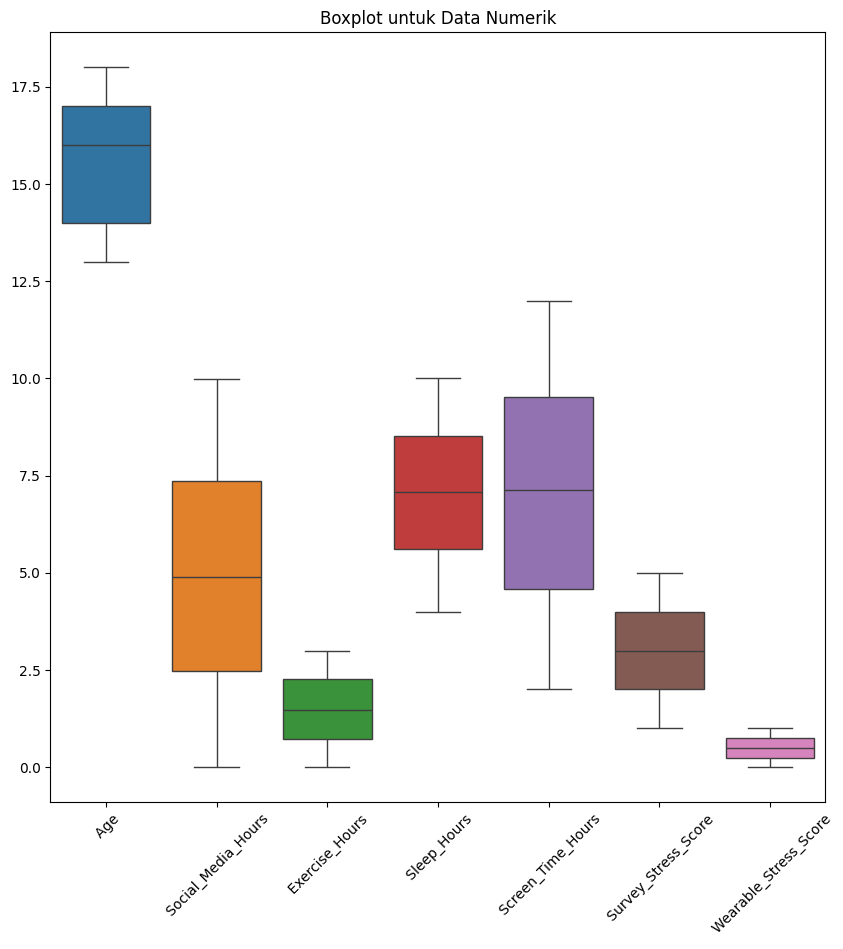

In [219]:
# Menampilkan semua boxplot untuk data numerik
numerical_columns = df.select_dtypes(include=["number"]).drop(columns=["User_ID"], errors="ignore")

plt.figure(figsize=(10, 10))
sns.boxplot(data=numerical_columns)
plt.xticks(rotation=45)  # Memiringkan label sumbu x agar lebih mudah dibaca
plt.title("Boxplot untuk Data Numerik")
plt.show()

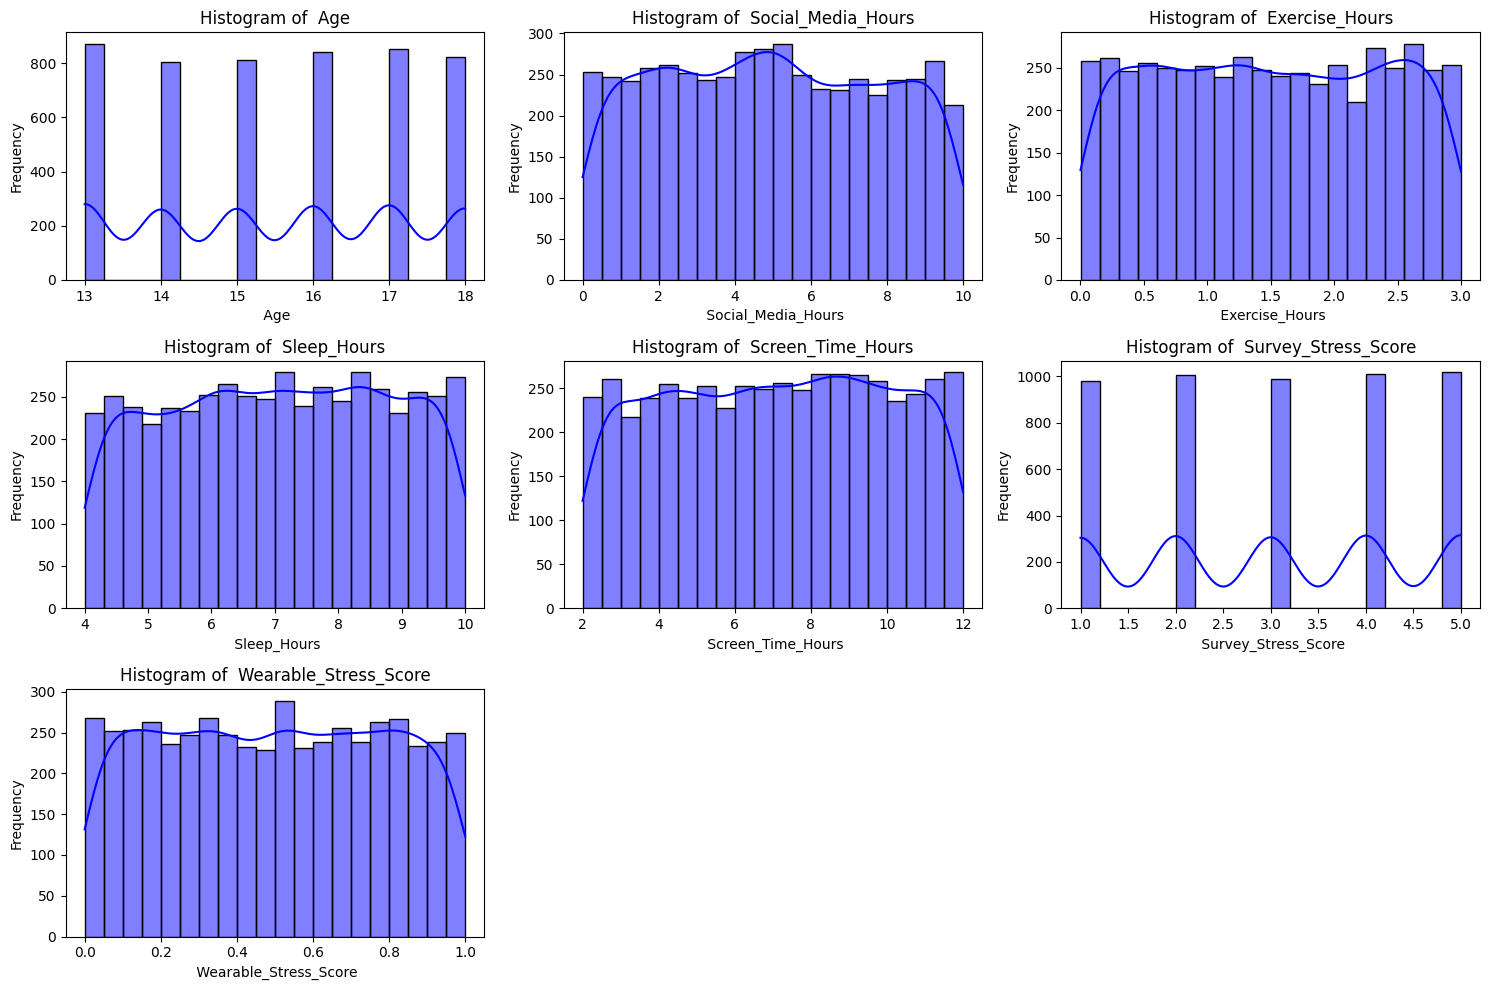

In [220]:
std_dev = numerical_columns.std()

# Membuat histogram untuk setiap fitur numerik
plt.figure(figsize=(15, 10))  # Menentukan ukuran figure
for i, col in enumerate(numerical_columns.columns):
    plt.subplot(3, 3, i + 1)  # Menyesuaikan jumlah subplot (3x3 bisa diubah)
    sns.histplot(df[col], bins=20, kde=True, color="blue")
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()  # Menyesuaikan layout agar tidak bertumpuk
plt.show()

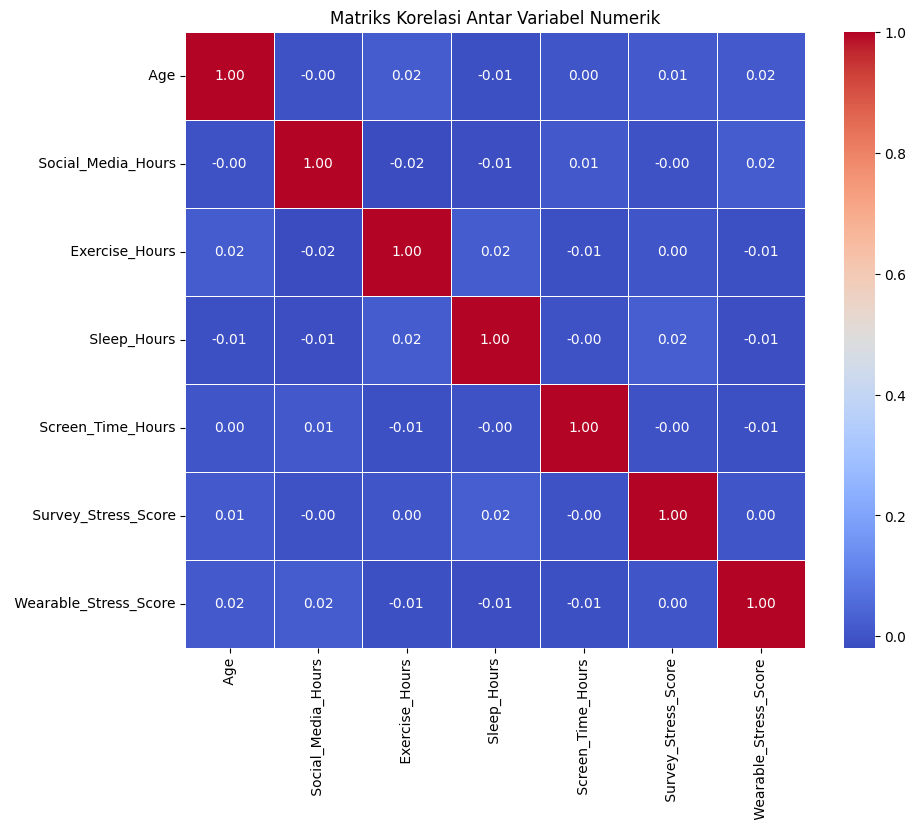

In [221]:
numerical_columns = df.select_dtypes(include=["number"]).drop(columns=["User_ID"], errors="ignore")

# Membuat matriks korelasi
correlation_matrix = numerical_columns.corr()

# Menampilkan heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriks Korelasi Antar Variabel Numerik")
plt.show()

## Data Preprocessing


In [222]:
df

,User_ID,Age,Gender,Social_Media_Hours,Exercise_Hours,Sleep_Hours,Screen_Time_Hours,Survey_Stress_Score,Wearable_Stress_Score,Support_System,Academic_Performance
0,1,16,F,9.654486,2.458001,5.198926,8.158189,3,0.288962,Moderate,Excellent
1,2,17,M,9.158143,0.392095,8.866097,5.151993,5,0.409446,Moderate,Good
2,3,15,M,5.028755,0.520119,4.943095,9.209325,2,0.423837,Moderate,Poor
3,4,17,F,7.951103,1.022630,5.262773,9.823658,5,0.666021,Moderate,Average
4,5,17,F,1.357459,1.225462,6.196080,11.338990,5,0.928060,High,Poor
...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,14,M,0.088148,1.003339,8.684888,5.922202,1,0.750205,Moderate,Average
4996,4997,15,F,7.161276,1.024644,5.312684,10.224924,4,0.427209,Moderate,Excellent
4997,4998,14,M,3.444383,2.877972,9.227726,4.059322,4,0.002893,High,Good
4998,4999,18,F,7.866525,2.395839,4.317831,10.657076,2,0.612063,High,Average


### Encoding data

In [223]:
df.columns = df.columns.str.strip()  # Menghapus spasi di awal dan akhir nama kolom


# Encoding Label untuk Gender, Support_System, dan Academic_Performance
label_encoder = LabelEncoder()

df["Gender"] = label_encoder.fit_transform(df["Gender"])  # F -> 0, M -> 1
df["Support_System"] = label_encoder.fit_transform(df["Support_System"])  
df["Academic_Performance"] = label_encoder.fit_transform(df["Academic_Performance"])  

# Menampilkan hasil encoding
df

,User_ID,Age,Gender,Social_Media_Hours,Exercise_Hours,Sleep_Hours,Screen_Time_Hours,Survey_Stress_Score,Wearable_Stress_Score,Support_System,Academic_Performance
0,1,16,0,9.654486,2.458001,5.198926,8.158189,3,0.288962,2,1
1,2,17,1,9.158143,0.392095,8.866097,5.151993,5,0.409446,2,2
2,3,15,1,5.028755,0.520119,4.943095,9.209325,2,0.423837,2,3
3,4,17,0,7.951103,1.022630,5.262773,9.823658,5,0.666021,2,0
4,5,17,0,1.357459,1.225462,6.196080,11.338990,5,0.928060,0,3
...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,14,1,0.088148,1.003339,8.684888,5.922202,1,0.750205,2,0
4996,4997,15,0,7.161276,1.024644,5.312684,10.224924,4,0.427209,2,1
4997,4998,14,1,3.444383,2.877972,9.227726,4.059322,4,0.002893,0,2
4998,4999,18,0,7.866525,2.395839,4.317831,10.657076,2,0.612063,0,0


### Standarisasi & Normalisasi data untuk data numerikal saja

In [224]:
# Identifikasi kolom numerik (kecuali User_ID)
numerical_cols = [ "Social_Media_Hours", "Exercise_Hours", "Sleep_Hours", 
                  "Screen_Time_Hours", "Wearable_Stress_Score"]

# Normalisasi dengan MinMaxScaler
minmax_scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[numerical_cols] = minmax_scaler.fit_transform(df_normalized[numerical_cols])

df_normalized

,User_ID,Age,Gender,Social_Media_Hours,Exercise_Hours,Sleep_Hours,Screen_Time_Hours,Survey_Stress_Score,Wearable_Stress_Score,Support_System,Academic_Performance
0,1,16,0,0.965925,0.819367,0.199645,0.615861,3,0.288944,2,1
1,2,17,1,0.916263,0.130571,0.811073,0.315198,5,0.409463,2,2
2,3,15,1,0.503098,0.173256,0.156990,0.720991,2,0.423858,2,3
3,4,17,0,0.795493,0.340798,0.210290,0.782433,5,0.666112,2,0
4,5,17,0,0.135767,0.408425,0.365900,0.933988,5,0.928227,0,3
...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,14,1,0.008767,0.334366,0.780860,0.392230,1,0.750321,2,0
4996,4997,15,0,0.716467,0.341470,0.218612,0.822565,4,0.427230,2,1
4997,4998,14,1,0.344574,0.959390,0.871367,0.205914,4,0.002792,0,2
4998,4999,18,0,0.787031,0.798641,0.052739,0.865787,2,0.612138,0,0


In [225]:
standard_scaler = StandardScaler()
df_standardized = df.copy()
df_standardized[numerical_cols] = standard_scaler.fit_transform(df_standardized[numerical_cols])
df_standardized

,User_ID,Age,Gender,Social_Media_Hours,Exercise_Hours,Sleep_Hours,Screen_Time_Hours,Survey_Stress_Score,Wearable_Stress_Score,Support_System,Academic_Performance
0,1,16,0,1.654869,1.098356,-1.079212,0.377898,3,-0.716698,2,1
1,2,17,1,1.480936,-1.265659,1.050340,-0.664759,5,-0.300863,2,2
2,3,15,1,0.033878,-1.119161,-1.227774,0.742471,2,-0.251193,2,3
3,4,17,0,1.057954,-0.544139,-1.042135,0.955543,5,0.584673,2,0
4,5,17,0,-1.252652,-0.312038,-0.500157,1.481115,5,1.489070,0,3
...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,14,1,-1.697456,-0.566213,0.945111,-0.397623,1,0.875225,2,0
4996,4997,15,0,0.781176,-0.541833,-1.013151,1.094717,4,-0.239558,2,1
4997,4998,14,1,-0.521333,1.578928,1.260341,-1.043737,4,-1.704030,0,2
4998,4999,18,0,1.028315,1.027224,-1.590870,1.244603,2,0.398445,0,0


## Pembagunan Model Clustering

### Menggunakan Metode Elbow Untuk Mencari jumlah Centroid yang optimal

In [226]:
df_standardized = df_standardized.drop(columns=['User_ID'])  


In [227]:
df_standardized

,Age,Gender,Social_Media_Hours,Exercise_Hours,Sleep_Hours,Screen_Time_Hours,Survey_Stress_Score,Wearable_Stress_Score,Support_System,Academic_Performance
0,16,0,1.654869,1.098356,-1.079212,0.377898,3,-0.716698,2,1
1,17,1,1.480936,-1.265659,1.050340,-0.664759,5,-0.300863,2,2
2,15,1,0.033878,-1.119161,-1.227774,0.742471,2,-0.251193,2,3
3,17,0,1.057954,-0.544139,-1.042135,0.955543,5,0.584673,2,0
4,17,0,-1.252652,-0.312038,-0.500157,1.481115,5,1.489070,0,3
...,...,...,...,...,...,...,...,...,...,...
4995,14,1,-1.697456,-0.566213,0.945111,-0.397623,1,0.875225,2,0
4996,15,0,0.781176,-0.541833,-1.013151,1.094717,4,-0.239558,2,1
4997,14,1,-0.521333,1.578928,1.260341,-1.043737,4,-1.704030,0,2
4998,18,0,1.028315,1.027224,-1.590870,1.244603,2,0.398445,0,0


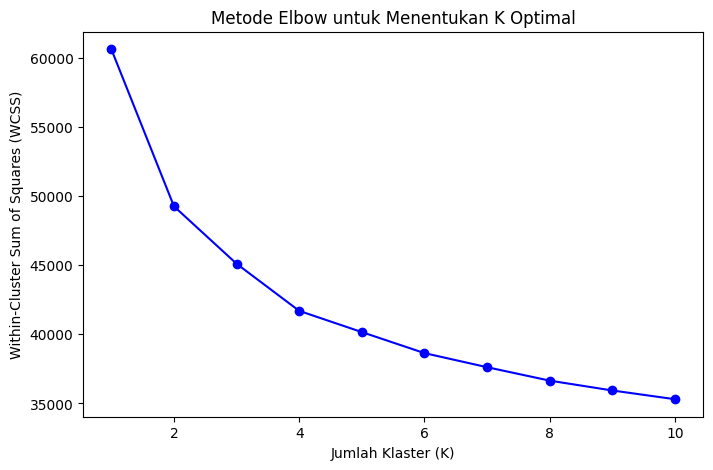

In [228]:
# Menentukan jumlah cluster optimal dengan Metode Elbow
wcss = []
K_range = range(1, 11)  # Coba dari 1 hingga 10 klaster

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(selected_features)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8,5))
plt.plot(K_range, wcss, marker="o", linestyle="-", color="b")
plt.xlabel("Jumlah Klaster (K)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("Metode Elbow untuk Menentukan K Optimal")
plt.show()


### Clustering

In [229]:
# Latih model K-Means dengan jumlah klaster optimal (contoh: K=3)
optimal_k = 4  # Sesuaikan dengan hasil Elbow
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_standardized_cluster = df_standardized.copy()
df_standardized_cluster["Cluster"] = kmeans.fit_predict(df_standardized)

In [230]:
df_standardized

,Age,Gender,Social_Media_Hours,Exercise_Hours,Sleep_Hours,Screen_Time_Hours,Survey_Stress_Score,Wearable_Stress_Score,Support_System,Academic_Performance
0,16,0,1.654869,1.098356,-1.079212,0.377898,3,-0.716698,2,1
1,17,1,1.480936,-1.265659,1.050340,-0.664759,5,-0.300863,2,2
2,15,1,0.033878,-1.119161,-1.227774,0.742471,2,-0.251193,2,3
3,17,0,1.057954,-0.544139,-1.042135,0.955543,5,0.584673,2,0
4,17,0,-1.252652,-0.312038,-0.500157,1.481115,5,1.489070,0,3
...,...,...,...,...,...,...,...,...,...,...
4995,14,1,-1.697456,-0.566213,0.945111,-0.397623,1,0.875225,2,0
4996,15,0,0.781176,-0.541833,-1.013151,1.094717,4,-0.239558,2,1
4997,14,1,-0.521333,1.578928,1.260341,-1.043737,4,-1.704030,0,2
4998,18,0,1.028315,1.027224,-1.590870,1.244603,2,0.398445,0,0


In [234]:
df_standardized_cluster

,Age,Gender,Social_Media_Hours,Exercise_Hours,Sleep_Hours,Screen_Time_Hours,Survey_Stress_Score,Wearable_Stress_Score,Support_System,Academic_Performance,Cluster
0,16,0,1.654869,1.098356,-1.079212,0.377898,3,-0.716698,2,1,3
1,17,1,1.480936,-1.265659,1.050340,-0.664759,5,-0.300863,2,2,0
2,15,1,0.033878,-1.119161,-1.227774,0.742471,2,-0.251193,2,3,2
3,17,0,1.057954,-0.544139,-1.042135,0.955543,5,0.584673,2,0,0
4,17,0,-1.252652,-0.312038,-0.500157,1.481115,5,1.489070,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...
4995,14,1,-1.697456,-0.566213,0.945111,-0.397623,1,0.875225,2,0,2
4996,15,0,0.781176,-0.541833,-1.013151,1.094717,4,-0.239558,2,1,1
4997,14,1,-0.521333,1.578928,1.260341,-1.043737,4,-1.704030,0,2,1
4998,18,0,1.028315,1.027224,-1.590870,1.244603,2,0.398445,0,0,3


### Visualisasi Hasil Clustering

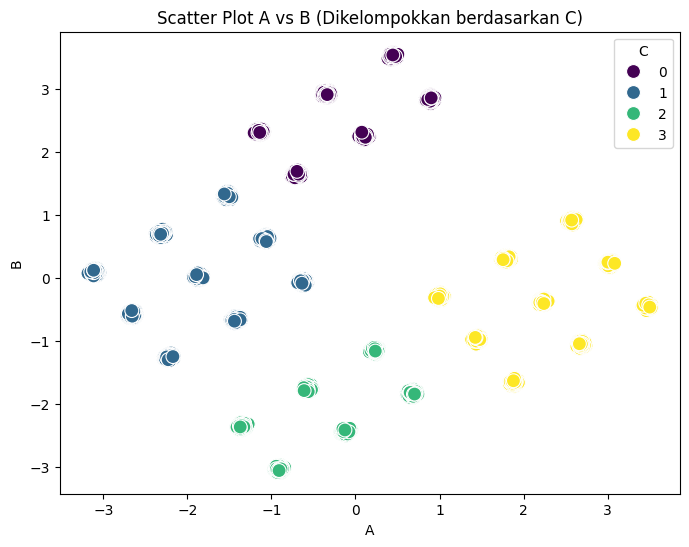

In [260]:

# Reduksi dimensi dengan PCA menjadi 2 komponen untuk visualisasi
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_standardized_cluster)

# Membuat DataFrame hasil PCA dan cluster
df_pca = pd.DataFrame(pca_result, columns=["PC1", "PC2"])
df_pca["Cluster"] = df_standardized_cluster["Cluster"]

# Membuat DataFrame
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca["PC1"], y=df_pca["PC2"], hue=df_pca["Cluster"], palette="viridis", s=100)
plt.title("Scatter Plot A vs B (Dikelompokkan berdasarkan C)")
plt.xlabel("A")
plt.ylabel("B")
plt.legend(title="C")
plt.show()